8.29 Perform the same computation as in Sec. 8.3, but determine
the value of L required for the circuit to dissipate to 1% of its original
value in t = 0.05 s, given R = 280 Ohm, and C = 10^-4 F.
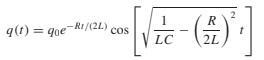

In [1]:
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fncal(L):
    C = 1e-4
    R = 280.0
    t = 0.05
    #q0/q(t)
    qq0 = 0.01
    et = np.exp(-(R*t/(2*L)))
    sq = ((1/(L*C)) - ((R/(2*L))**2))**(1/2)
    fl = et*np.cos(sq*t) - qq0
    return fl

def Bisection(xl, xu, err, fnc):
    print('Bisection')
    er = err+100
    i = 0
    xrn = 0
    fxl = fnc(xl)
    x = np.array([])
    y = np.array([])
    while not er <= err:
        i += 1
        x = np.append(x,i)
        xr = xrn
        xrn = (xl+xu)/2
        fxr = fnc(xrn)
        if not xrn == 0:
            er = np.abs(((xrn - xr) / xrn)) * 100
        y = np.append(y, er)
        if (fxl * fxr < 0):
            xu = xrn
        elif (fxl * fxr >0):
            xl = xrn
            fxl = fxr
        else:
            print('i = {:3d}, L = {:22}, error = {}%'.format(i,xrn,er))
            return x, y
            break
        print('i = {:3d}, L = {:22}, error = {}%'.format(i,xrn,er))
    return x, y

def FlasePosition(xl, xu, err, fnc):
    print('FlasePosition')
    xrn = 0
    i = 0
    er = err +100
    fxl = fnc(xl)
    fxu = fnc(xu)
    x = np.array([])
    y = np.array([])
    while not er <= err:
        i += 1
        x = np.append(x,i)
        xr = xrn
        xrn = xu-(fxu*(xl-xu))/(fxl - fxu)
        fxr = fnc(xrn)
        if not xrn == 0:
            er = np.abs((xrn - xr)/xrn) * 100
        y = np.append(y, er)
        if (fxl * fxr <0):
            xu = xrn
            fxu = fxr
        elif (fxl * fxr >0):
            xl = xrn
            fxl = fxr
        else:
            print('i = {:3d}, L = {:22}, error = {}%'.format(i,xrn,er))
            return x, y
            break
        print('i = {:3d}, L = {:22}, error = {}%'.format(i,xrn,er))
    return x, y


Bisection
i =   1, L =                  3.485, error = 100.0%
i =   2, L =                 2.7275, error = 27.772685609532534%
i =   3, L =                2.34875, error = 16.12559872272486%
i =   4, L =               2.538125, error = 7.4612164491504585%
i =   5, L =              2.4434375, error = 3.8751758536897314%
i =   6, L =             2.39609375, error = 1.9758721878056742%
i =   7, L =            2.419765625, error = 0.9782713976689469%
i =   8, L =     2.4079296875000002, error = 0.4915399964310583%
i =   9, L =          2.40201171875, error = 0.24637551531514115%
i =  10, L =         2.404970703125, error = 0.12303619213137668%
i =  11, L =        2.4034912109375, error = 0.06155596412282233%
i =  12, L =       2.40423095703125, error = 0.030768512134256687%
i =  13, L =      2.403861083984375, error = 0.015386623184639152%
i =  14, L =     2.4040460205078125, error = 0.007692719767417945%
i =  15, L =     2.4039535522460938, error = 0.0038465078342432325%
i =  16, L =     

Text(0, 0.5, '%Error')

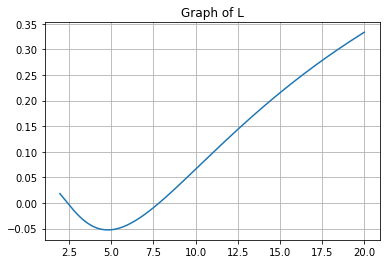

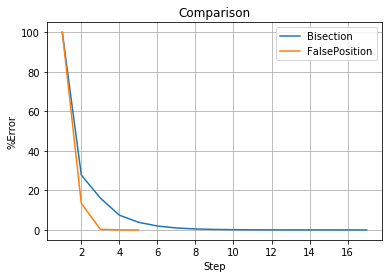

In [9]:
x1, y1 = Bisection(1.97,5,0.001,fncal)
x2, y2 = FlasePosition(1.97,5,0.001,fncal)

x = np.arange(1.96,20,1e-4)
#x = np.linspace(0,20,1000)
fig1 = plt.figure()
plt.title('Graph of L')
plt.plot(x, fncal(x))
plt.grid()

fig2 = plt.figure()
plt.title('Comparison')
plt.plot(x1, y1, label='Bisection')
plt.plot(x2, y2, label='FalsePosition')
plt.legend()
plt.grid()
plt.xlabel('Step')
plt.ylabel('%Error')